In [1]:
import numpy as np
import os
from tfidf import TFIDF_counter, doc_counter, verb_filter
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("pastel")


Create necessary DF for counting verbs according to class, and pair them to a single infinitive form

In [3]:
# Load in all the jsons, make the list of DFs, make the array of keys
sorted_classes = ['class 1','class 2','class 3',
            'class 4','class 5','class 6',
            'class 7','class 8','class 9',
            'class 10','class 11','class 12',
            'class 13','class 14','class 15',
            'class 16','irregular'] #irregular is class 17 in the code
All_conjs_df      = []
All_conjs_array   = np.array(['VERB', 0, "VERB CLASS"], dtype= object)
for i in sorted_classes:
    with open(f"..\\conj_dict_jsons\\Target_conjs_{i}.json", 'r', encoding='utf-8') as json_file:
        vrbs = json.load(json_file)
    cat_keys  = np.array(list(vrbs.keys()), dtype = object)
    plc_hldr  = np.zeros(np.size(cat_keys), dtype = int)
    cat_class = np.empty(np.size(cat_keys), dtype = str)

    cat_array = np.column_stack((cat_keys, plc_hldr, cat_class))
    df        = pd.DataFrame.from_dict(vrbs, orient='index')

    All_conjs_array = np.vstack((All_conjs_array,cat_array))
    All_conjs_df.append(df)

#Populate these according to language speaker
All_conjs_array_N  = All_conjs_array
All_conjs_array_NN = All_conjs_array
All_conjs_array_CL = All_conjs_array

In [4]:
## Bring in all the counts from the desired corpus
import re
from collections import Counter

## Non-native
with open('..\\text_transform\\texts_txt\\nonnative\\NN_TOTAL_CORPUS.txt', encoding='utf-8') as file:
    words = re.findall(r'\w+', file.read().lower())

top_words_NN = Counter(words)
c_list_NN    = list(top_words_NN.items())

## Native
with open('..\\text_transform\\texts_txt\\native\\N_TOTAL_CORPUS.txt', encoding='utf-8') as file:
    words = re.findall(r'\w+', file.read().lower())

top_words_N = Counter(words)
c_list_N    = list(top_words_N.items())

## Class
with open('..\\text_transform\\texts_txt\\class\\C_DOCX_CORPUS.txt', encoding='utf-8') as file:
    words = re.findall(r'\w+', file.read().lower())

top_words_CL = Counter(words)
c_list_CL    = list(top_words_CL.items())

# sanity check
print(len(c_list_NN))
print(len(c_list_N))
print(len(c_list_CL))

# NEED ARRAYS
c_arr_NN  = np.array(c_list_NN, dtype=object)
c_arr_N   = np.array(c_list_N, dtype=object)
c_arr_CL  = np.array(c_list_CL, dtype=object)


11686
6134
18737


In [5]:
NonZ_NN  = verb_filter(c_arr_NN, All_conjs_df, All_conjs_array_NN)
NonZ_N   = verb_filter(c_arr_N, All_conjs_df, All_conjs_array_N)
NonZ_CL  = verb_filter(c_arr_CL, All_conjs_df, All_conjs_array_CL)

In [ ]:
# Notice how many verbs you end up with
print(len(NonZ_NN))
print(len(NonZ_N))
print(len(NonZ_CL))

486
545
893


In [7]:
N_txt_fp  = '..\\text_transform\\texts_alpha\\native\\txts'
NN_txt_fp = '..\\text_transform\\texts_alpha\\nonnative\\txts'
CL_txt_fp = '..\\text_transform\\texts_alpha\\class\\txts'

N_tfidf   = TFIDF_counter(N_txt_fp, NonZ_N, All_conjs_df, All_conjs_array_N)
NN_tfidf  = TFIDF_counter(NN_txt_fp, NonZ_NN, All_conjs_df, All_conjs_array_NN)
CL_tfidf  = TFIDF_counter(CL_txt_fp, NonZ_CL, All_conjs_df, All_conjs_array_CL)

In [8]:
NN_Tfs = np.column_stack((NonZ_NN,NN_tfidf))
N_Tfs  = np.column_stack((NonZ_N,N_tfidf))
CL_Tfs = np.column_stack((NonZ_CL,CL_tfidf))

In [ ]:
# If you want to take a look at some of the rows
print(NN_Tfs[:-5])

In [ ]:
# sanity check 
# Columns are: Verb, Unique Counts, Class, TFIDF score
print(np.shape(NN_Tfs))
print(np.shape(N_Tfs))
print(np.shape(CL_Tfs))

(486, 4)
(545, 4)
(893, 4)


In [ ]:
# Check for the intersection between groups
def corpus_sct(X_tfs, Y_tfs):
    _ , X_sct_ind, Y_sct_ind  = np.intersect1d(X_tfs[:,0],Y_tfs[:,0], return_indices = True)
    X_FTsct     = X_tfs[X_sct_ind]
    Y_FTsct     = Y_tfs[Y_sct_ind]

    Y_not_in_X = np.setdiff1d(Y_tfs[:,0], X_tfs[:,0], assume_unique=True)

    return X_FTsct, Y_FTsct, Y_not_in_X

NN_N_sct, N_NN_sct, N_not_NN = corpus_sct(NN_Tfs, N_Tfs)
NN_C_sct, C_NN_sct, C_not_NN = corpus_sct(NN_Tfs, CL_Tfs)
N_C_sct , C_N_sct,  C_not_N  = corpus_sct(N_Tfs, CL_Tfs)

In [ ]:
print(np.shape(N_not_NN))
print(np.shape(C_not_NN))
print(np.shape(C_not_N))

print(C_not_NN[:25]) 

(59,)
(407,)
(348,)
['бегать' 'болеть' 'болтаться' 'бросать' 'бросаться' 'возражать'
 'воображать' 'воспитывать' 'вспыхивать' 'встречать' 'вступать'
 'выделяться' 'выпивать' 'выполнять' 'выпускать' 'гонять' 'делаться'
 'добиваться' 'добывать' 'доверять' 'дожидаться' 'допускать' 'достигать'
 'жалеть' 'желать']


In [12]:
print(np.shape(NN_N_sct))
print(np.shape(N_NN_sct))

print(np.shape(NN_C_sct))
print(np.shape(C_NN_sct))

print(np.shape(N_C_sct))
print(np.shape(C_N_sct))

(486, 4)
(486, 4)
(486, 4)
(486, 4)
(545, 4)
(545, 4)


#Plotter

In [83]:
def sct_plotter(Sct_X, Sct_Y, group_X, group_Y):
    '''
    prints side-by-side the intersected arrays
    args:
    Sct_X   - intersection of X and Y
    Sct_Y   - intersection of Y and X
    group_X - string name of the group X
    group_Y - string name of the group Y
    returns:
    sorted arrays from high to low TF-IDFs
    '''
    #sort in alphabetical order to make sure we have the same starting point
    sorted_indices_X = np.argsort(Sct_X[:, 0])
    sorted_indices_Y = np.argsort(Sct_Y[:, 0])

    sorted_X = Sct_X[sorted_indices_X]
    sorted_Y = Sct_Y[sorted_indices_Y]

    # Step 2: Sort one array (sorted_X) from high to low based on the float values in the second column
    sorted_indices_X_by_float = np.argsort(sorted_X[:, 3].astype(float))[::-1]
    sorted_X = sorted_X[sorted_indices_X_by_float]

    # Step 3: Sort the second array (sorted_Y) based on the obtained indices of the first array
    sorted_Y = sorted_Y[sorted_indices_X_by_float]


    categories  = sorted_X[:,0]
    indices     = np.arange(len(categories))
    bar_width   = 0.75

    plt.figure(figsize=(16, 3))
    font_properties = {'fontsize': 15, 'fontweight': 'bold'}
    #plt.title(f"Нормализованное употребление глаголов в каждой группе", fontdict=font_properties)
    plt.bar(indices[:82:2], sorted_X[:82:2,3], width=bar_width, label= group_X)
    plt.bar(indices[:82:2]+bar_width, sorted_Y[:82:2,3], width=bar_width, label= group_Y)

    plt.yscale('log')
    #plt.xlabel('Каждый второй глагол из 80 самых распространенных',fontsize='x-large')
    #plt.ylabel('Коэффициент TF-IDF',fontsize='large')
    plt.xticks(indices[:82:2],categories[:82:2], rotation=45, ha='right')
    plt.grid(True)
    plt.legend(fontsize=20)
    plt.show()

    return sorted_X, sorted_Y



NN_N_sct, N_NN_sct = corpus_sct(NN_Tfs, N_Tfs)
NN_C_sct, C_NN_sct = corpus_sct(NN_Tfs, CL_Tfs)

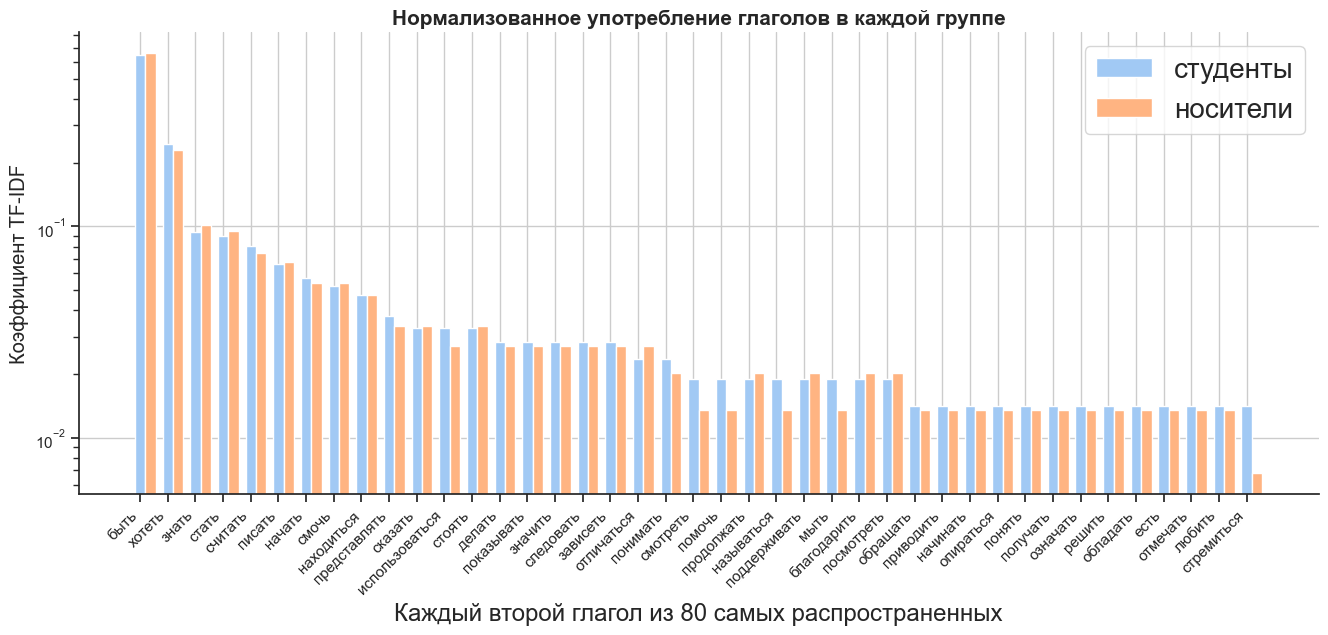

In [74]:
srt_NN_n, srt_N_nn = sct_plotter(NN_N_sct, N_NN_sct, 'студенты', 'носители')

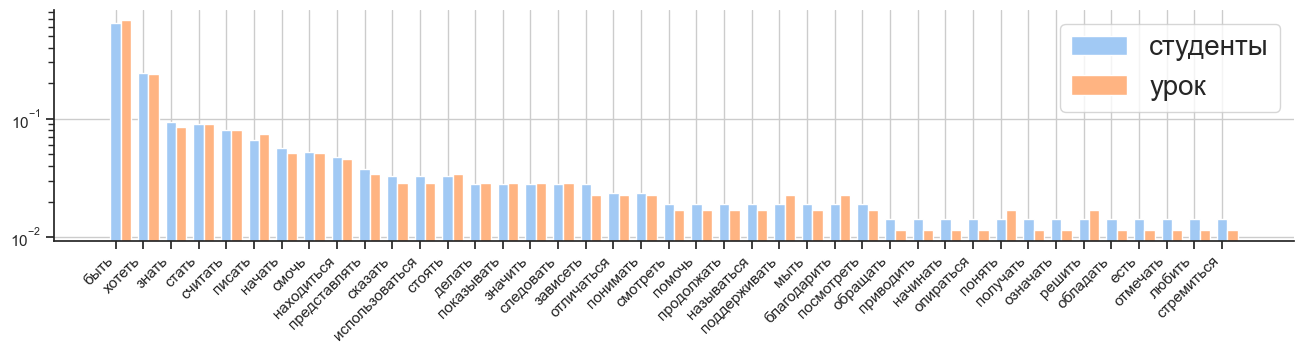

In [84]:
srt_NN_c, srt_C_nn = sct_plotter(NN_C_sct, C_NN_sct, 'студенты', 'урок')

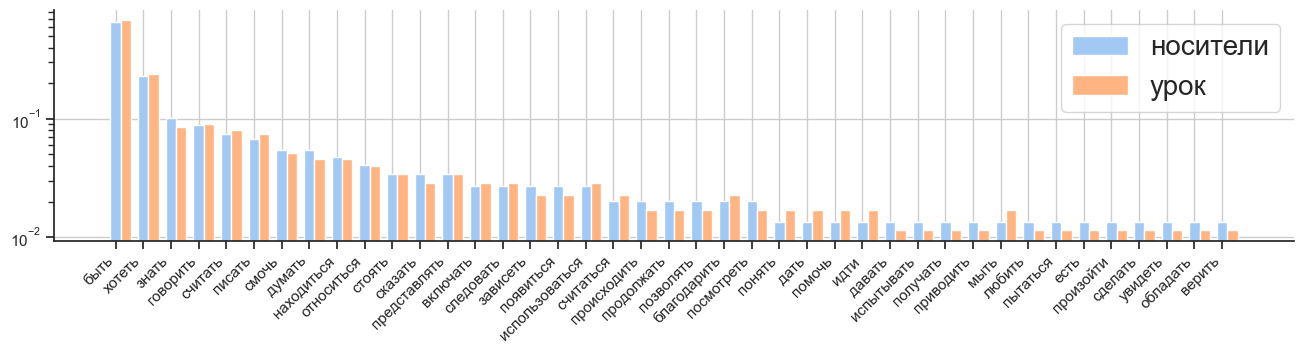

In [85]:
srt_N_c, srt_C_n = sct_plotter(N_C_sct, C_N_sct, 'носители', 'урок')

# Compare numbers and give back lists

In [ ]:
def comp_groups(group_X, group_Y):
    learn_list = []
    clean_list = []

    for i in range(len(group_X[:,0])):
        X = group_X[i,3]
        Y = group_Y[i,3]
        F = X - Y

        if np.abs(F) >= ( X * 0.25):
            if F > 0:
                clean_list.append(group_X[i].tolist())
            if F < 0:
                learn_list.append(group_X[i].tolist())
        else:
            pass
    return learn_list, clean_list

In [ ]:
l_list, c_list = comp_groups(srt_NN_n, srt_N_nn)
with open('learn_NN_n.txt', 'w', encoding='utf-8') as file:
    for i in l_list:
        file.write(f'{i[0]}\n')
with open('clean_NN_n.txt', 'w', encoding='utf-8') as file:
    for i in c_list:
        file.write(f'{i[0]}\n')

print(len(l_list))
print(len(c_list))

In [ ]:
l_list, c_list = comp_groups(srt_NN_c, srt_C_nn)
with open('learn_NN_c.txt', 'w', encoding='utf-8') as file:
    for i in l_list:
        file.write(f'{i[0]}\n')
with open('clean_NN_c.txt', 'w', encoding='utf-8') as file:
    for i in c_list:
        file.write(f'{i[0]}\n')

print(len(l_list))
print(len(c_list))

In [ ]:
l_list, c_list = comp_groups(srt_N_c, srt_C_n)
with open('learn_N_c.txt', 'w', encoding='utf-8') as file:
    for i in l_list:
        file.write(f'{i[0]}\n')
with open('clean_N_c.txt', 'w', encoding='utf-8') as file:
    for i in c_list:
        file.write(f'{i[0]}\n')

print(len(l_list))
print(len(c_list))

### Beginning of future plans


In [ ]:
# Non-visualization check of intersections
print(f"Amount of unique verbs used by Non-native speakers: {len(NonZ_NN)}")
print(f"Amount of unique verbs used by Native speakers: {len(NonZ_N)}")
# Elements in NonZ_N but not in NonZ_NN
inNatives_NotinNN = np.setdiff1d(NonZ_N[:, 0], NonZ_NN[:, 0], assume_unique=True)

# Elements in NonZ_NN but not in NonZ_N
inNN_NotinNatives  = np.setdiff1d(NonZ_NN[:, 0], NonZ_N[:, 0], assume_unique=True)
# Elements in both NonZ_N and NonZ_NN
inBoth = np.intersect1d(NonZ_N[:, 0], NonZ_NN[:, 0])

# Elements not in both (either in NonZ_N or NonZ_NN, but not in both)
notInBoth = np.setxor1d(NonZ_N[:, 0], NonZ_NN[:, 0])

print("In NonZ_N but not in NonZ_NN:", np.shape(inNatives_NotinNN)[0])
print("In NonZ_NN but not in NonZ_N:", np.shape(inNN_NotinNatives)[0])
print("In both NonZ_N and NonZ_NN:", np.shape(inBoth)[0])
print("Not in both (either in NonZ_N or NonZ_NN, but not in both):", np.shape(notInBoth)[0])
